In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('colorblind')
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif',
    rc={'font.size':12, 'mathtext.fontset': 'cm', 'axes.labelpad':0, 'axes.linewidth': 0.5})

## WM

In [7]:
empirical = pd.read_pickle("data/behavior.pkl")
sids = empirical['sid'].unique()
# df0s = []
# df1s = []
errors0 = []
errors1 = []
for sid in sids:
    try:
        df0 = pd.read_pickle(f"data/z0/wm_sid{sid}.pkl")
        df1 = pd.read_pickle(f"data/z1/wm_sid{sid}.pkl")
        human_actions = df0.query("type=='human'")['action'].to_numpy()
        model0_actions = df0.query("type=='model-WM'")['action'].to_numpy()
        model1_actions = df1.query("type=='model-WM'")['action'].to_numpy()
        error0 = len(np.where(model0_actions != human_actions)[0]) / len(human_actions)
        error1 = len(np.where(model1_actions != human_actions)[0]) / len(human_actions)
        errors0.append(error0)
        errors1.append(error1)
    except:
        print(f"missing {sid}")

missing 16
missing 33
missing 44
missing 45
missing 64
missing 66
missing 74
missing 90
missing 92
missing 94
missing 98
missing 104
missing 106
missing 131
missing 134
missing 136
missing 141
missing 147
missing 155
missing 161
missing 163
missing 165
missing 168
missing 172
missing 181
missing 184
missing 185
missing 186
missing 196
missing 207


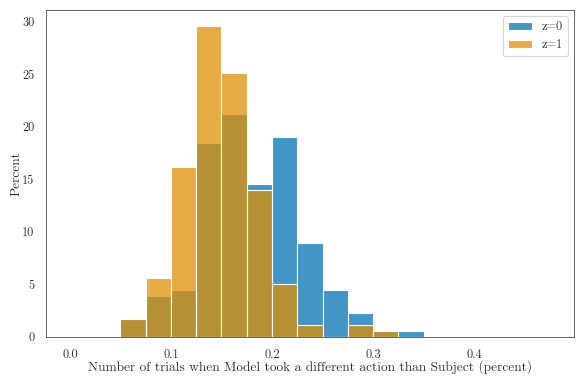

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
bins = np.arange(0.0, 0.5, 0.025)
sns.histplot(errors0, ax=ax, stat='percent', color=palette[0], label='z=0', bins=bins)
sns.histplot(errors1, ax=ax, stat='percent', color=palette[1], label='z=1', bins=bins)
ax.set(xlabel="Number of trials when Model took a different action than Subject (percent)") 
ax.legend()
plt.tight_layout()
fig.savefig("plots/wm_errors.png", dpi=600)

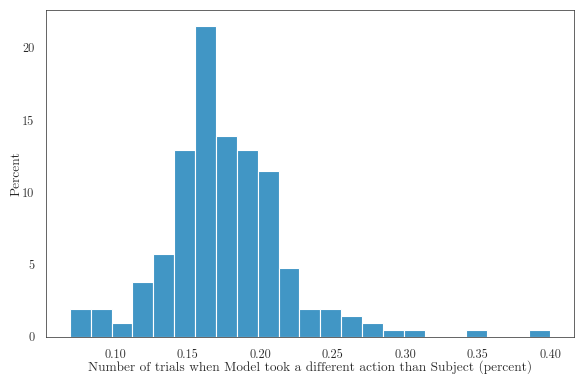

In [41]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
sns.histplot(errors0, ax=ax, stat='percent', color=palette[0], label='z=0')
sns.histplot(errors1, ax=ax, stat='percent', color=palette[1], label='z=1')
ax.set(xlabel="Number of trials when Model took a different action than Subject (percent)") 
plt.tight_layout()
fig.savefig("plots/wm_errors.png", dpi=600)